In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# Combine the data into a single dataset
# new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Count the number of rides in each city type
summary_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
summary_ride_count_df = pd.DataFrame(summary_ride_count)
summary_ride_count_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [17]:
# Count the number of drivers in each city type
summary_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
summary_driver_count_df = pd.DataFrame(summary_driver_count)
summary_driver_count_df

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [18]:
# Count the fare total in each city type
summary_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
summary_fares_df = pd.DataFrame(summary_fares)
summary_fares_df

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [19]:
# Determine the Average fare per Ride for each city type
avg_fare_per_ride = summary_fares / summary_ride_count
avg_fare_per_ride_df = pd.DataFrame(avg_fare_per_ride)
avg_fare_per_ride_df

,0
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [20]:
# Determine the Average fare per driver for each city type
avg_fare_per_driver = summary_fares / summary_driver_count
avg_fare_per_driver_df = pd.DataFrame(avg_fare_per_driver)
avg_fare_per_driver_df

,0
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [21]:
# Merge summary info into 1 dataframe
summary_df = pd.concat([summary_ride_count_df, summary_driver_count_df, summary_fares_df, avg_fare_per_ride_df, avg_fare_per_driver_df], axis=1)

# Format dataframe

# Delete Index name
summary_df.index.name = None

# Rename Columns
summary_df.columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']

# Format Values: Add $ signs, commas, only show 2 sig figs.
summary_df['Total Rides'] = summary_df['Total Rides'].apply(lambda x: "{:,.0f}".format(x))
summary_df['Total Drivers'] = summary_df['Total Drivers'].apply(lambda x: "{:,.0f}".format(x))
summary_df['Total Fares'] = summary_df['Total Fares'].apply(lambda x: "${:,.2f}".format(x))
summary_df['Average Fare per Ride'] = summary_df['Average Fare per Ride'].apply(lambda x: "${:,.2f}".format(x))
summary_df['Average Fare per Driver'] = summary_df['Average Fare per Driver'].apply(lambda x: "${:,.2f}".format(x))
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [22]:
# Create new dataframe from pyber data and rename columns
pyber_data_rename_df = pyber_data_df
pyber_data_rename_df.columns = ['City', 'Date', 'Fare', 'Ride ID', 'No. Drivers', 'City Type']
pyber_data_rename_df

,City,Date,Fare,Ride ID,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [23]:
# Set Date as index for fare by week df
indexed_pyber_data_rename_df = pyber_data_rename_df.set_index('Date')
# fare_by_week_df
indexed_pyber_data_rename_df

,City,Fare,Ride ID,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [24]:
# Remove unwanted columns, Ride ID, No. Drivers
short_indexed_pyber_data_rename_df = indexed_pyber_data_rename_df[['City Type', 'Fare', ]].copy()
short_indexed_pyber_data_rename_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [25]:
# Set index data type to date
# short_indexed_fare_by_week_df.index.astype('datetime64[ns]')
short_indexed_pyber_data_rename_df.index = pd.to_datetime(short_indexed_pyber_data_rename_df.index)

# Verify index data type is datetime
short_indexed_pyber_data_rename_df.info()

# short_indexed_fare_by_week_df['a'] = short_indexed_fare_by_week_df.index.hour
short_indexed_pyber_data_rename_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [26]:
# Determine the sum of fares by city type
sum_fares_urban_df = short_indexed_pyber_data_rename_df.groupby(['City Type']).sum()['Fare'].reset_index()
sum_fares_urban_df


,City Type,Fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [27]:
# Create pivot table
pivot_fares_df = short_indexed_pyber_data_rename_df.pivot_table(index='Date', columns='City Type', values='Fare')
pivot_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [28]:
# pivot_fare_by_week_df["2019-02":"2019-03"]
pivot_fares__range_df = pivot_fares_df.loc['2019-01-01':'2019-04-28', :]
pivot_fares__range_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [29]:
# Sort pivot table by week
fares_by_week_df = pivot_fares__range_df.resample('W').sum()
fares_by_week_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


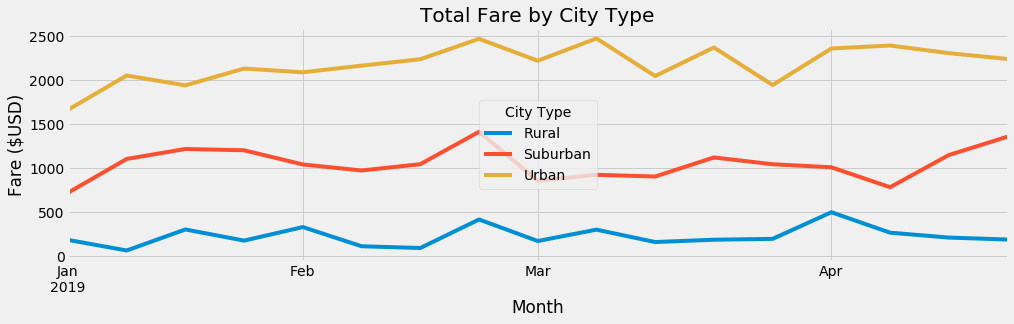

In [32]:
# Set plot style fivethirtyeight
plt.style.use('fivethirtyeight')

# plot the fares by week dataframe
fares_by_week_df.plot(figsize=(15,4))

# Label figure
plt.xlabel('Month')
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')

# Move legend
plt.legend(loc='center', title='City Type')

# Save Figure
plt.savefig("Analysis\Total_Fare_by_City_Type.png")

# Show figure
plt.show()

In [31]:
# Show Summary_DF again, for convenience
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57
